In [2]:
# Imports

In [3]:
from mlchecks.base import Dataset
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
from mlchecks.checks.performance import ConfusionMatrixReport

In [4]:
# Generating data:

In [5]:
iris = load_iris(as_frame=True)
clf = AdaBoostClassifier()
frame = iris.frame
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
clf.fit(X_train, y_train)
ds = Dataset(pd.concat([X_test, y_test], axis=1), 
            features=iris.feature_names,
            label='target')

In [6]:
# Running confusion_matrix_report check:

In [7]:
check = ConfusionMatrixReport()

Confusion Matrix Report

Return the confusion_matrix.

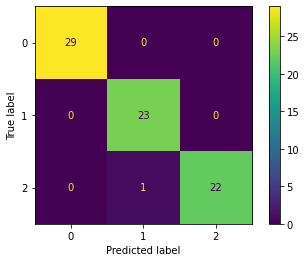

In [8]:
check.run(ds, clf)